## Boston House Pricing Prediction Use Case
***

<i>(!) Disclaimer: This project is for the purpose of Data Analytics/Machine Learning practice and using dataset from [kaggle](https://www.kaggle.com/c/boston-housing)</i>.
<br><br>
<b>Background</b>:
There is a new family (consist of Father, Mother, and 2 children) that want to move to Boston, and looking for secure and have many rooms house as their budget is around $25,000. This family have 2 children (one boy and one girl). They want a house that has 7 rooms (1 master bedroom, 2 child bedroom, 2 bathroom, 1 kitchen, 11 family room). The Father and Mother did not know much about property business, so they ask you as Data Scientist to help them make an engine to predict house pricing so they can considerate which one is the best to be purchased.
<br><br>
<b>Objective</b>:<br>
1. Create a house pricing prediction engine for the family<br>
2. Find 10 best house recommendation that meet the family's needs (budget \~\$25,000, 7 rooms, and secure from crime)

Written by: [ishaq101](https://github.com/Ishaq101)

### About Dataset

Housing Values in Suburbs of Boston
The `medv` variable is the target variable.
<br><br>

<b>Data description</b>
The Boston data frame has 506 rows and 14 columns.
<br><br>
This data frame contains the following columns:<br>
`crim` : per capita crime rate by town.<br>
`zn` : proportion of residential land zoned for lots over 25,000 sq.ft.<br>
`indus` : proportion of non-retail business acres per town.<br>
`chas` : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
`nox` : nitrogen oxides concentration (parts per 10 million).<br>
`rm` : average number of rooms per dwelling.<br>
`age` : proportion of owner-occupied units built prior to 1940.<br>
`dis` : weighted mean of distances to five Boston employment centres.<br>
`rad` : index of accessibility to radial highways.<br>
`tax` : full-value property-tax rate per \$10,000.<br>
`ptratio` : pupil-teacher ratio by town.<br>
`black` : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.<br>
`lstat` : lower status of the population (percent).<br>
`medv` : median value of owner-occupied homes in \$1000s.<br>

<br><br>
<b>Source</b><br>
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## 00 Library Import

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense

warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn')

# 01 Load Dataset

In [4]:
path = 'datasets'
list_df = os.listdir(path)
list_df

['train.csv', 'test.csv']

In [5]:
# import train.csv dataset
df_train = pd.read_csv(os.path.join(path,list_df[0]))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# 02 EDA (Exploratory Data Analysis)

In [8]:
# @markdown Number Room per Dwelling
# @markdown it seems there are 80 houses with 7 rooms

df_train['rm'].apply(round).value_counts().sort_index()

rm
4      4
5     26
6    206
7     80
8     16
9      1
Name: count, dtype: int64

In [9]:
df_train['rm_rounded'] = df_train['rm'].apply(round)

In [11]:
!pip install jenkspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.0/611.0 kB 5.2 MB/s eta 0:00:00


In [12]:
import jenkspy
crime_breaks = jenkspy.jenks_breaks(df_train['crim'],n_classes=3)
crime_breaks

[0.00632, 6.80117, 28.6558, 73.5341]

According to jenks clustering of `crim` (crime rate) for 3 class, we got crime rate class as below:
1. Low : 0.00632 - 6.80117
2. Med : 6.80117 - 28.6558
3. High : 28.6558 - 73.5341

In [13]:
# @markdown now let's check for the average crime rate (`crim`) vs number room (`rm_rounded`) per dwelling. Now we see that range of crime for house with 7 rooms is 0.00632 - 15.28800 (Low crime rate).
# @markdown <br><br>Notes: `rm_rounded` is round of `rm` value

df_train.groupby('rm_rounded').agg({'crim': ['count','min', 'max','mean','std']})

crim                                         
           count      min       max       mean        std
rm_rounded                                               
4              4  4.55587  20.08490  14.165292   6.989764
5             26  0.15086  45.74610  11.278271  12.923670
6            206  0.01096  73.53410   3.205046   7.094682
7             80  0.00632  15.28800   1.266239   2.984863
8             16  0.01501   2.01019   0.439494   0.559665
9              1  0.52693   0.52693   0.526930        NaN

In [14]:
df_train.describe()
# df_train.describe().loc[['min','max'],:]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,rm_rounded
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769,6.243243
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468,0.726639
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000,4.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000,6.000000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000,6.000000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000,7.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000,9.000000


In [15]:
df_train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv', 'rm_rounded'],
      dtype='object')

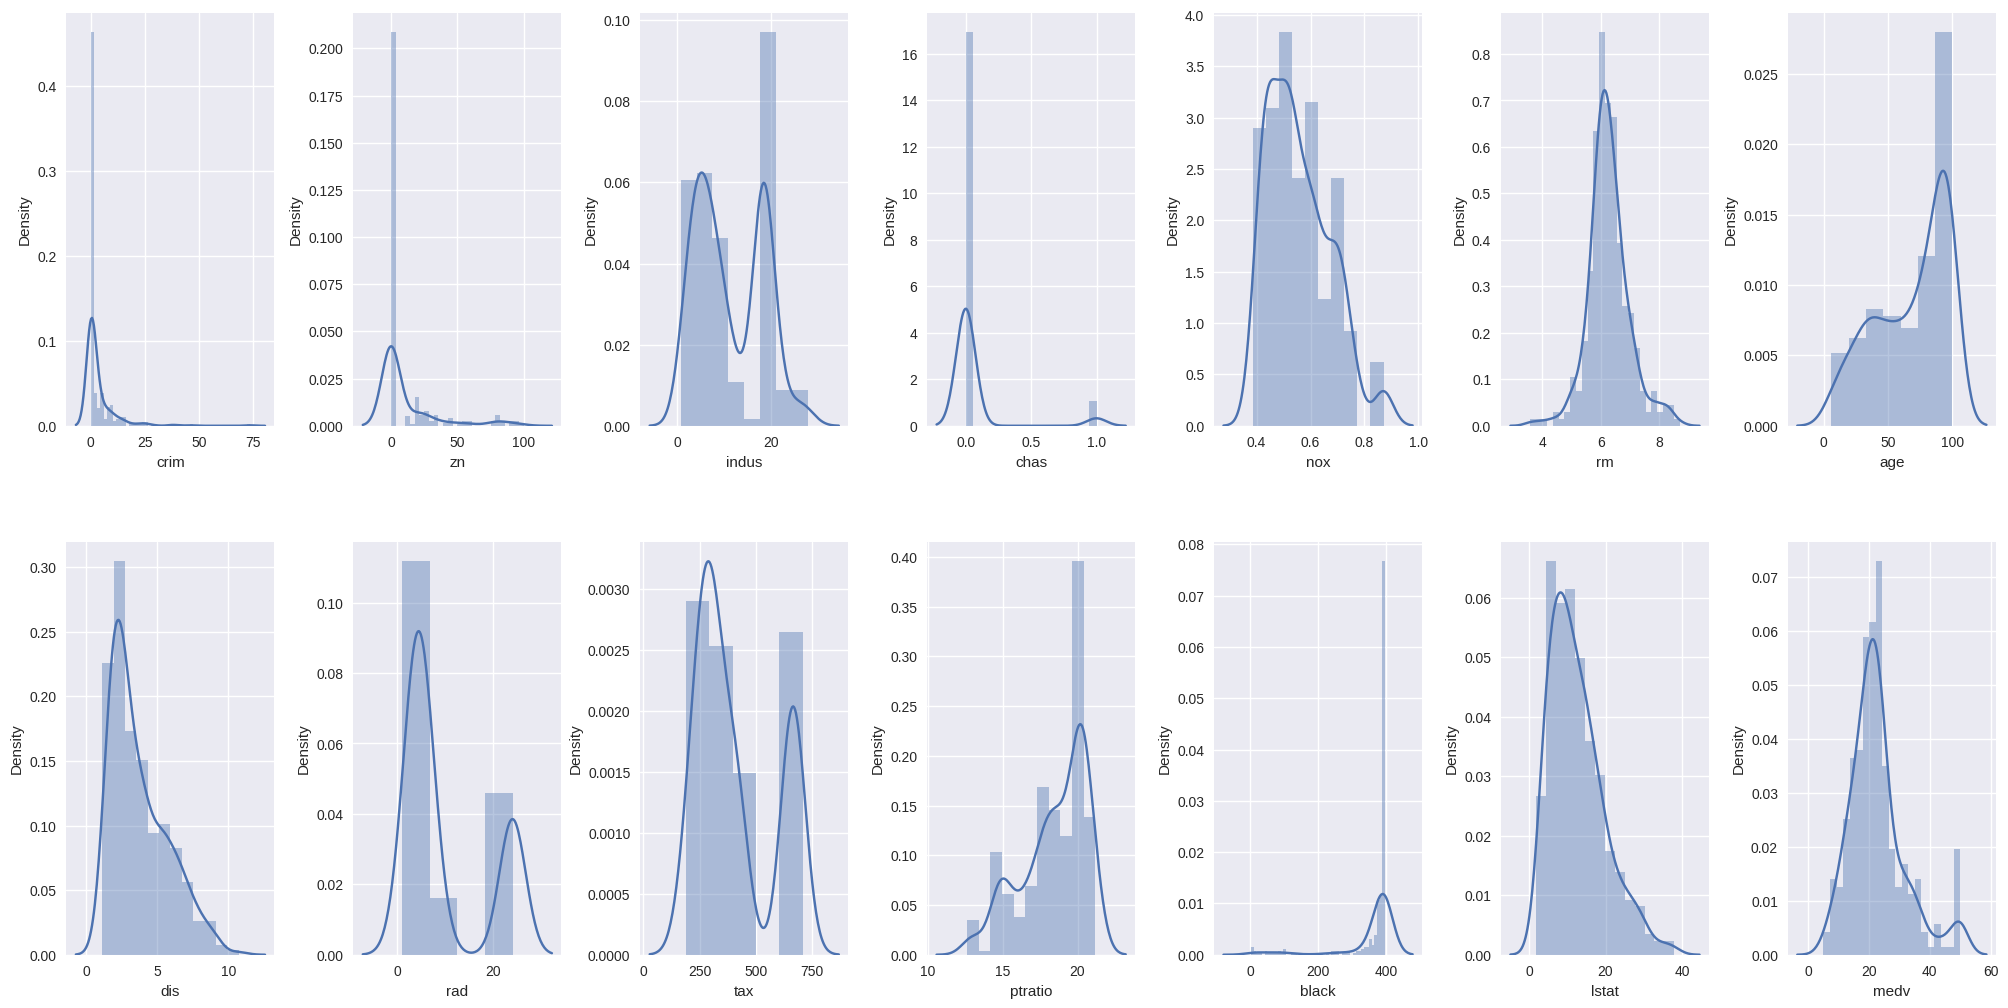

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
data=df_train[df_train.columns[1:]]

for k,v in data.items():
      if index>=len(data.columns)-1:
        break
      else:
        sns.distplot(v, ax=axs[index])
        index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

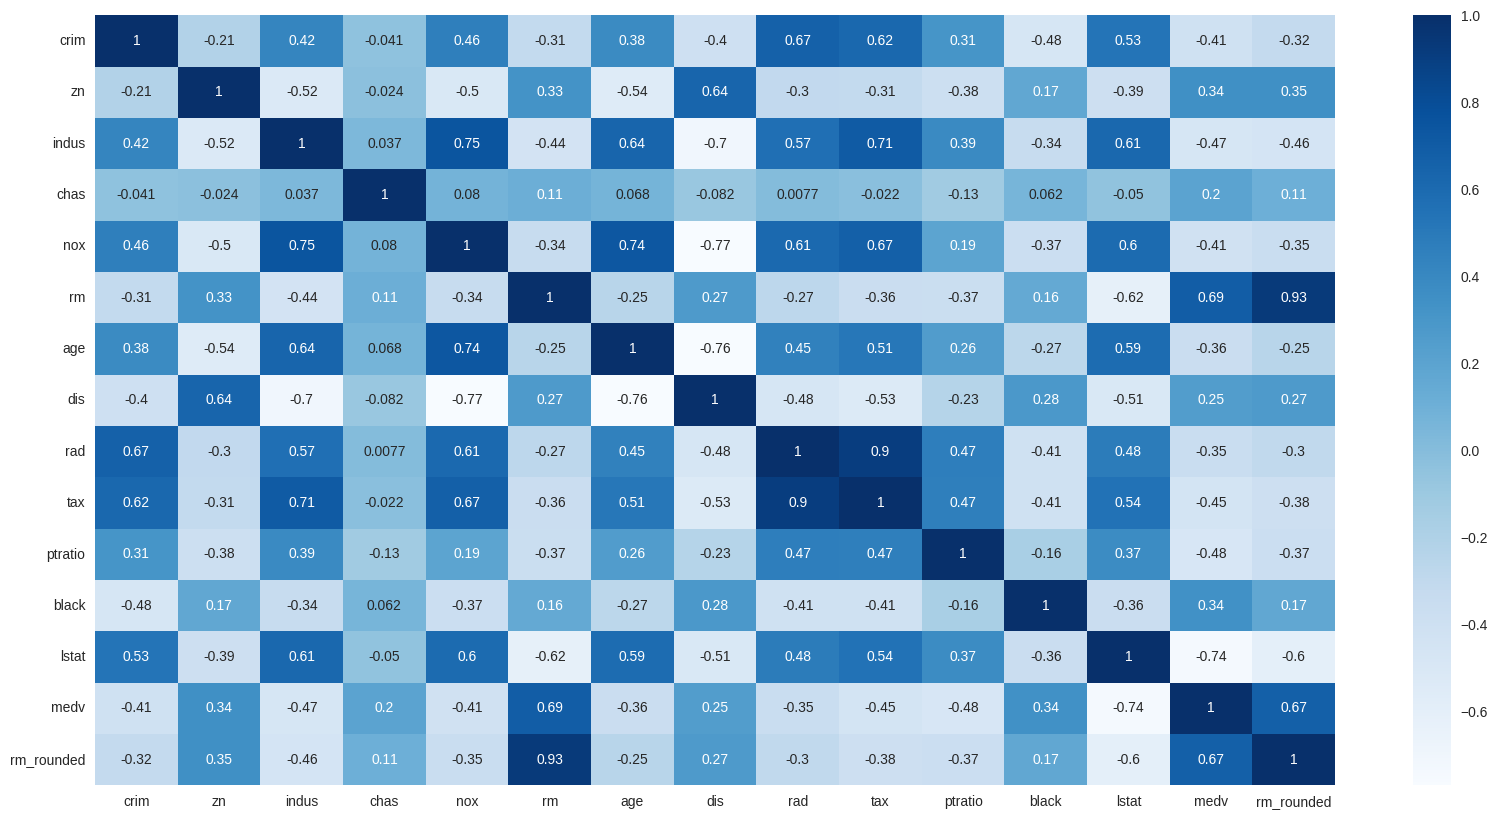

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),  annot=True, cmap="Blues")

In [18]:
# find correlation between features and target `medv`
data.corr()['medv'][df_train.columns[1:-1]].sort_values()

lstat     -0.738600
ptratio   -0.481376
indus     -0.473932
tax       -0.448078
nox       -0.413054
crim      -0.407454
age       -0.358888
rad       -0.352251
chas       0.204390
dis        0.249422
black      0.336660
zn         0.344842
rm         0.689598
medv       1.000000
Name: medv, dtype: float64

According to correlation test, between 13 features and target label `medv`, we could list top 3 positive and negative correlation.

Top 3 positives:
1. `rm`
2. `zn`
3. `black`

Top 3 negatives:
1. `lstat`
2. `ptratio`
3. `indus`


# 03 Model Development and Evaluation

In [19]:
df_train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv', 'rm_rounded'],
      dtype='object')

In [20]:
# define features and label
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']
label = 'medv'

In [21]:
# @markdown according to min/max value of each features, we could see that every features has different range of data, so we will do scaling before train this data.

df_train[features].describe().loc[['min','max']]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
min,0.00632,0.0,0.74,0.0,0.385,3.561,6.0,1.1296,1.0,188.0,12.6,3.5,1.73
max,73.53410,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,21.2,396.9,37.97


In [22]:
from sklearn.preprocessing import MinMaxScaler

X = df_train[features]
y = df_train[label]

scaler = MinMaxScaler(feature_range=(0.001,1))
X_scaled = scaler.fit_transform(X)

In [39]:
# !pip install joblib

In [40]:
import joblib

# save scaler to disk (only run this line once after you fit_transform features)
# joblib.dump(scaler,os.path.join('models','scaler.joblib'))

In [23]:
# split dataset into training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

lin_reg = LinearRegression().fit(X_train,y_train)
xg_reg = XGBRegressor(objective ='reg:linear').fit(X_train,y_train)
sgd_reg = SGDRegressor().fit(X_train,y_train)
tre_reg = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
rf_reg = RandomForestRegressor(max_depth=3, random_state=0).fit(X_train,y_train)
vot_reg = VotingRegressor(estimators=[('tre', tre_reg), ('rf', rf_reg), ('sgd', sgd_reg), ('lr', lin_reg), ('xg',xg_reg)]).fit(X_train,y_train)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [[lin_reg,'lin_reg'],[sgd_reg,'sgd_reg'],[tre_reg,'tre_reg'],[xg_reg,'xgb_reg'],[rf_reg,'rfo_reg'],[vot_reg,'vot_reg']]
df_metrics_train = pd.DataFrame()

for m in models:
    cols = []
    y_pred = m[0].predict(X_train)
    mae = mean_absolute_error(y_train,y_pred)
    cols.append(mae)
    mse = mean_squared_error(y_train,y_pred)
    cols.append(mse)
    rmse = np.sqrt(mse)
    cols.append(rmse)
    r2 = r2_score(y_train,y_pred)
    cols.append(r2)
    df_metrics_train['metrics'] = ['mae','mse','rmse','r2']
    df_metrics_train[f'{m[1]}'] = cols

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [[lin_reg,'lin_reg'],[sgd_reg,'sgd_reg'],[tre_reg,'tre_reg'],[xg_reg,'xgb_reg'],[rf_reg,'rfo_reg'],[vot_reg,'vot_reg']]
df_metrics = pd.DataFrame()

for m in models:
    cols = []
    y_pred = m[0].predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    cols.append(mae)
    mse = mean_squared_error(y_test,y_pred)
    cols.append(mse)
    rmse = np.sqrt(mse)
    cols.append(rmse)
    r2 = r2_score(y_test,y_pred)
    cols.append(r2)
    df_metrics['metrics'] = ['mae','mse','rmse','r2']
    df_metrics[f'{m[1]}'] = cols

In [34]:
# train
df_metrics_train

,metrics,lin_reg,sgd_reg,tre_reg,xgb_reg,rfo_reg,vot_reg
0,mae,3.385223,3.401200,2.807959,0.001902,2.408887,2.064770
1,mse,23.640152,25.901630,14.227903,0.000008,9.952819,7.943258
2,rmse,4.862114,5.089364,3.771989,0.002741,3.154809,2.818379
3,r2,0.726883,0.700756,0.835624,1.000000,0.885014,0.908231


In [33]:
# testing
df_metrics

,metrics,lin_reg,sgd_reg,tre_reg,xgb_reg,rfo_reg,vot_reg
0,mae,3.411528,3.241945,2.680823,2.346198,2.353747,2.196802
1,mse,21.041489,19.522092,12.373920,10.161532,9.191053,8.735431
2,rmse,4.587100,4.418381,3.517658,3.187716,3.031675,2.955576
3,r2,0.725469,0.745293,0.838556,0.867421,0.880083,0.886028


In [41]:
model_path = 'models'

# save metrics evaluation
df_metrics.to_csv(f'{model_path}/df_metrics.csv',index=False)

# save models
for m in models:
  joblib.dump(m[0],f'{model_path}/{m[1]}.joblib')

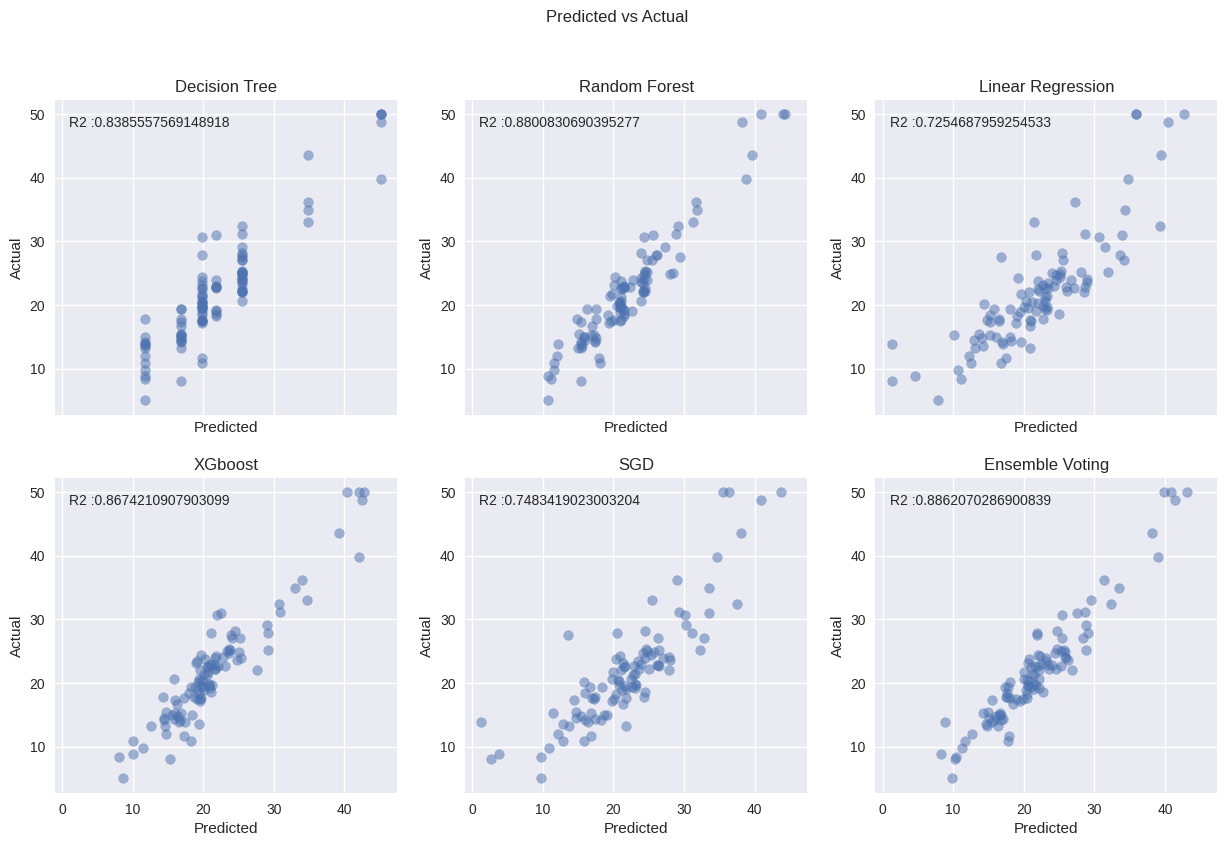

In [ ]:
predicted_tre = tre_reg.predict(X_test)
predicted_rf = rf_reg.predict(X_test)
predicted_lin = lin_reg.predict(X_test)
predicted_xg = xg_reg.predict(X_test)
predicted_sgd = sgd_reg.predict(X_test)
predicted_vot = vot_reg.predict(X_test)

fig, ([ax0, ax1, ax2], [ax3, ax4, ax5]) = plt.subplots(nrows=2, ncols=3, sharex=True,figsize=(15, 9))

ax0.scatter(predicted_tre, y_test, alpha=0.5)
ax0.set_xlabel('Predicted')
ax0.set_ylabel('Actual')
ax0.set_title('Decision Tree')
ax0.text(1, 48,s='R2 :'+str(df_metrics['tre_reg'][3]))

ax1.scatter(predicted_rf, y_test, alpha=0.5)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Random Forest')
ax1.text(1, 48,s='R2 :'+str(df_metrics['rfo_reg'][3]))

ax2.scatter(predicted_lin, y_test, alpha=0.5)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Linear Regression')
ax2.text(1, 48,s='R2 :'+str(df_metrics['lin_reg'][3]))

ax3.scatter(predicted_xg, y_test, alpha=0.5)
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_title('XGboost')
ax3.text(1, 48,s='R2 :'+str(df_metrics['xgb_reg'][3]))

ax4.scatter(predicted_sgd, y_test, alpha=0.5)
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')
ax4.set_title('SGD')
ax4.text(1, 48,s='R2 :'+str(df_metrics['sgd_reg'][3]))

ax5.scatter(predicted_vot, y_test, alpha=0.5)
ax5.set_xlabel('Predicted')
ax5.set_ylabel('Actual')
ax5.set_title('Ensemble Voting')
ax5.text(1, 48,s='R2 :'+str(df_metrics['vot_reg'][3]))

plt.suptitle('Predicted vs Actual')
plt.show()

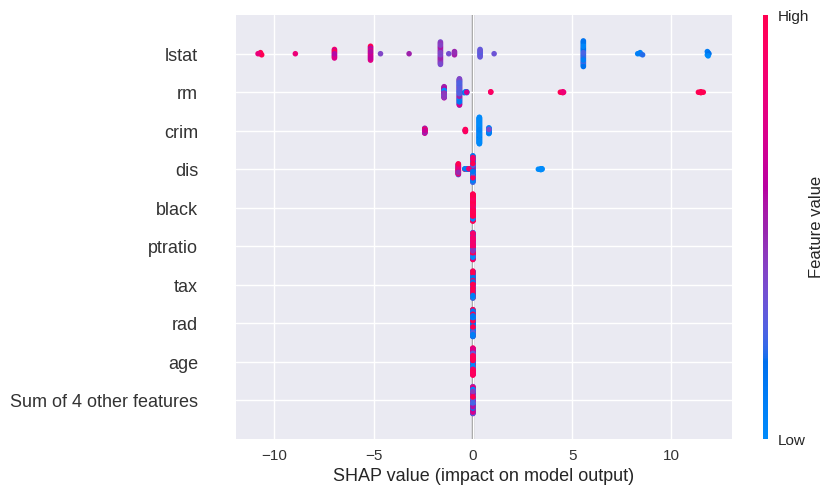

In [ ]:
import shap
explainer = shap.Explainer(tre_reg.predict, X_test)
explainer.feature_names = features
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

PermutationExplainer explainer: 101it [00:19,  2.73it/s]


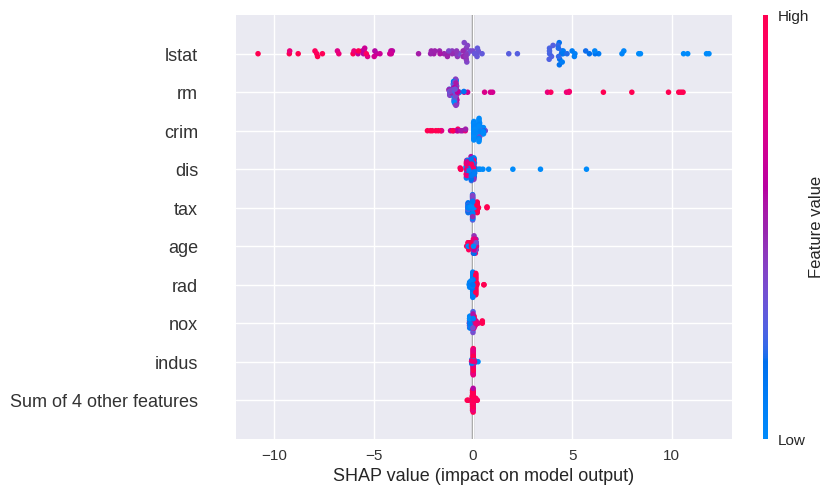

In [ ]:
import shap
explainer = shap.Explainer(rf_reg.predict, X_test)
explainer.feature_names = features
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

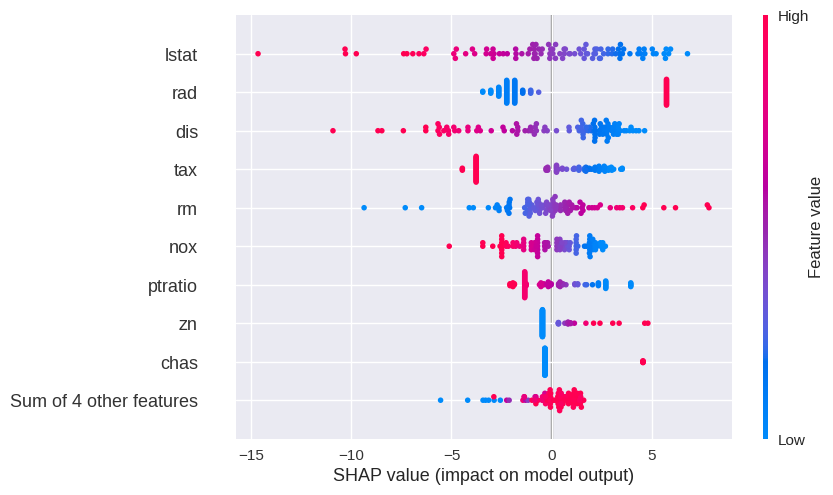

In [ ]:
import shap
explainer = shap.Explainer(lin_reg.predict, X_test)
explainer.feature_names = features
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

PermutationExplainer explainer: 101it [00:39,  2.10it/s]


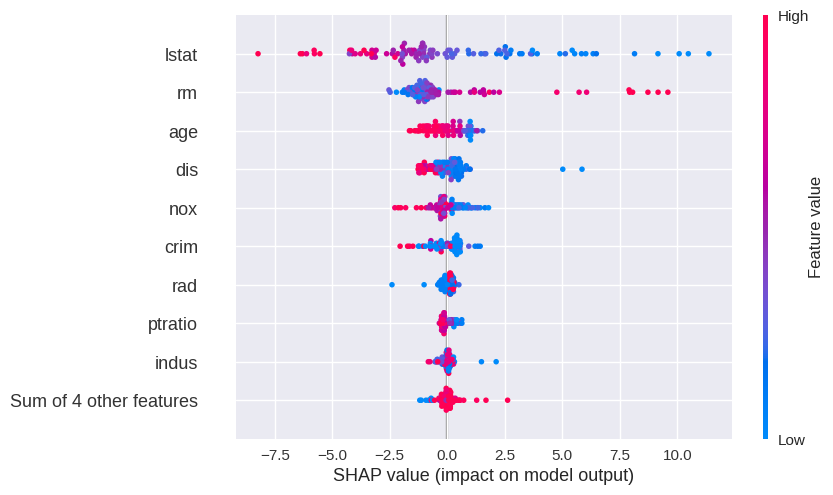

In [ ]:
import shap
explainer = shap.Explainer(xg_reg.predict, X_test)
explainer.feature_names = features
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

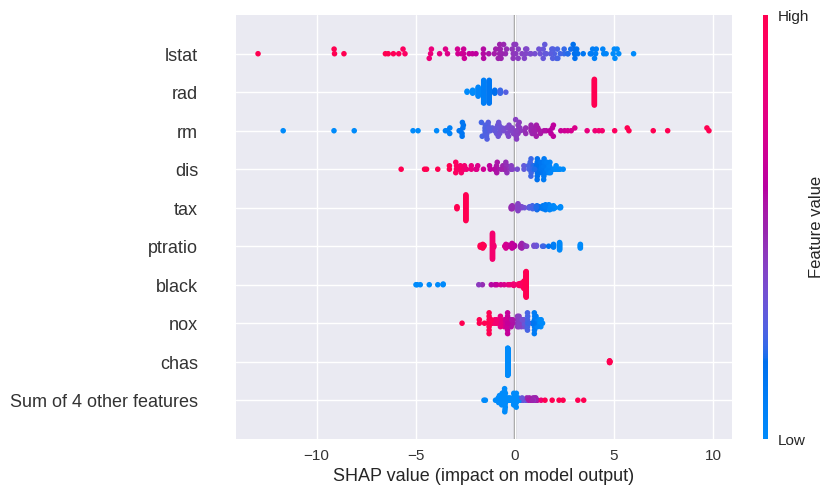

In [ ]:
import shap
explainer = shap.Explainer(sgd_reg.predict, X_test)
explainer.feature_names = features
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

PermutationExplainer explainer: 101it [01:25,  1.09it/s]


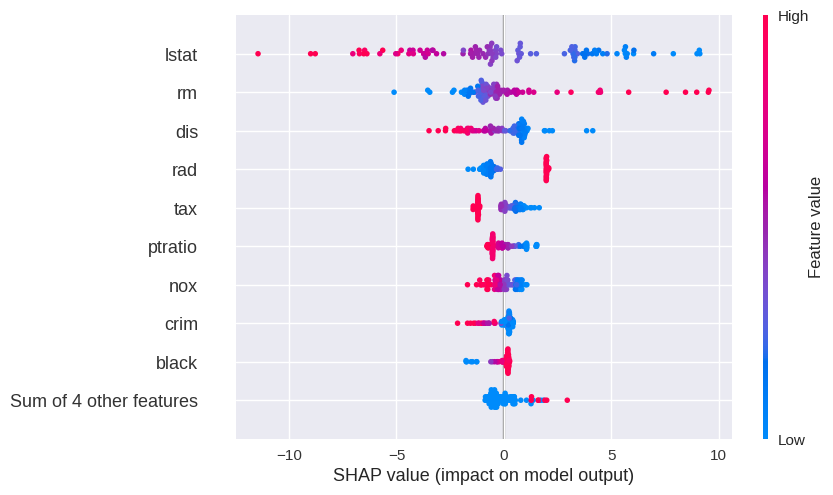

In [ ]:
import shap
explainer = shap.Explainer(vot_reg.predict, X_test)
explainer.feature_names = features
shap_values = explainer(X_test)
# feature_names = pipe.steps[0][1].get_feature_names_out()
shap.plots.beeswarm(shap_values)

Model Selection
- We make sure for predicted data is also has continuous pattern as actual, based on "Predicted vs Actual" plot, we got <b>Random Forest</b>, <b>Linear Regression</b>, <b>XGboost</b>, <b>SGD</b>, and <b>Voting</b>.
- As other references from metrics evaluation for each trained models, we have top 3 best models, which are <b>Random Forest</b>, <b>Voting</b>, and <b>XGboost</b>.
- We prefer to choose <b>XGbosst</b> as our main predictor due to more continuous and expalainable for each features according to SHAP plot.

According to table `df_metrics_train` and `df_metrics`, we have
- The most highest R^2 train: XGBoost
- The most highest R^2 test: Voting Ensemble
- The most lowest R^2 drop (abs(test-train)): Random Forest (0.004931)

Since, R^2 test of Random Forest and Voting has difference ~0.01 (small), and **Random Forest** has more stable performance. Besides, according to shap value, **Random Forest** could show importance features. Then we prefer to choose Random Forest as House Pricing Predictor.

# 04 House Recommendation

Remember our objectives at begining. We also have second dataset called `test.csv` which assumed as data that we want to predict the `medv` and as the list recommendation for the Family.

In [35]:
# grab test.csv dataset
# remember this dataset does not have `medv` column!

df_test = pd.read_csv(os.path.join(path,'test.csv'))

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       173 non-null    int64  
 1   crim     173 non-null    float64
 2   zn       173 non-null    float64
 3   indus    173 non-null    float64
 4   chas     173 non-null    int64  
 5   nox      173 non-null    float64
 6   rm       173 non-null    float64
 7   age      173 non-null    float64
 8   dis      173 non-null    float64
 9   rad      173 non-null    int64  
 10  tax      173 non-null    int64  
 11  ptratio  173 non-null    float64
 12  black    173 non-null    float64
 13  lstat    173 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


In [37]:
df_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [42]:
# load model
predictor = joblib.load(f'{model_path}/rfo_reg.joblib')
scaler = joblib.load(f'{model_path}/scaler.joblib')
X_tobe_predict = scaler.transform(df_test[features])
predicted = predictor.predict(X_tobe_predict)

df_predicted = df_test.copy()
df_predicted['medv_predicted'] = predicted

In [ ]:
df_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              173 non-null    int64  
 1   crim            173 non-null    float64
 2   zn              173 non-null    float64
 3   indus           173 non-null    float64
 4   chas            173 non-null    int64  
 5   nox             173 non-null    float64
 6   rm              173 non-null    float64
 7   age             173 non-null    float64
 8   dis             173 non-null    float64
 9   rad             173 non-null    int64  
 10  tax             173 non-null    int64  
 11  ptratio         173 non-null    float64
 12  black           173 non-null    float64
 13  lstat           173 non-null    float64
 14  medv_predicted  173 non-null    float32
dtypes: float32(1), float64(10), int64(4)
memory usage: 19.7 KB


In [43]:
df_predicted.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv_predicted
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,36.531049
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,24.622439
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,16.332976
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,15.714399
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,17.494376


In [44]:
df_predicted.describe()['medv_predicted']

count    173.000000
mean      22.523823
std        7.815573
min       10.731471
25%       17.000386
50%       21.111688
75%       24.607983
max       46.265287
Name: medv_predicted, dtype: float64

In [45]:
df_train.describe()['medv']

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

Recall family's house criteria:
- budget ~$25,000
- 7 rooms, and
- secure from crime (low crime rate)

as third criterion has been achieved, next we find houses with `medv` around ~$25,000 and has 7 rooms

In [50]:
# 1. filter houses with 7 rooms
# 2. filter houses with medv <= $25,000
# 3. prioritized from lowest crime rate
# 4. Get top 10 houses

df_predicted[(round(df_predicted['rm'])==7) & (df_predicted['medv_predicted']<=25)].sort_values(by=['crim']).iloc[:10].reset_index(drop=True)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv_predicted
0,290,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51,24.327163
1,53,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,24.607983
2,218,0.07013,0.0,13.89,0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69,23.002480
3,352,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.909993
4,240,0.09252,30.0,4.93,0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,24.752260
5,96,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65,24.835571
6,296,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,396.90,6.27,24.835571
7,315,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304,18.4,395.69,9.28,24.236493
8,30,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98,21.551289
9,474,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,11.66,24.801922


In [52]:
houses_id_recommendation = list(df_predicted[(round(df_predicted['rm'])==7) & (df_predicted['medv_predicted']<=25)].sort_values(by=['crim']).iloc[:10].reset_index(drop=True)['ID'])
np.sort(houses_id_recommendation)

array([ 30,  53,  96, 218, 240, 290, 296, 315, 352, 474])

Finally, we have 10 houses that can be offered to the Family which the ID is
<b>30,  53,  96, 218, 240, 290, 296, 315, 352, 474</b>